Following this: https://medium.com/@akelleh/a-technical-primer-on-causality-181db2575e41

In [45]:
import numpy as np
import pandas as pd

In [66]:
size = 1000
x = np.random.normal(size=size)
y = x + np.random.normal(size=size)
z = y + np.random.normal(size=size)
X = pd.DataFrame({'x': x, 'y': y, 'z': z})

In [67]:
X.head()

,x,y,z
0,-0.220187,-0.083461,0.418283
1,0.530673,0.476369,-0.068782
2,0.440757,0.704468,1.416936
3,1.186084,1.051752,1.604409
4,0.409822,0.274045,-0.873918


In [68]:
corr = X.corr()
corr.style.background_gradient()

,x,y,z
x,1,0.702373,0.594544
y,0.702373,1,0.828736
z,0.594544,0.828736,1


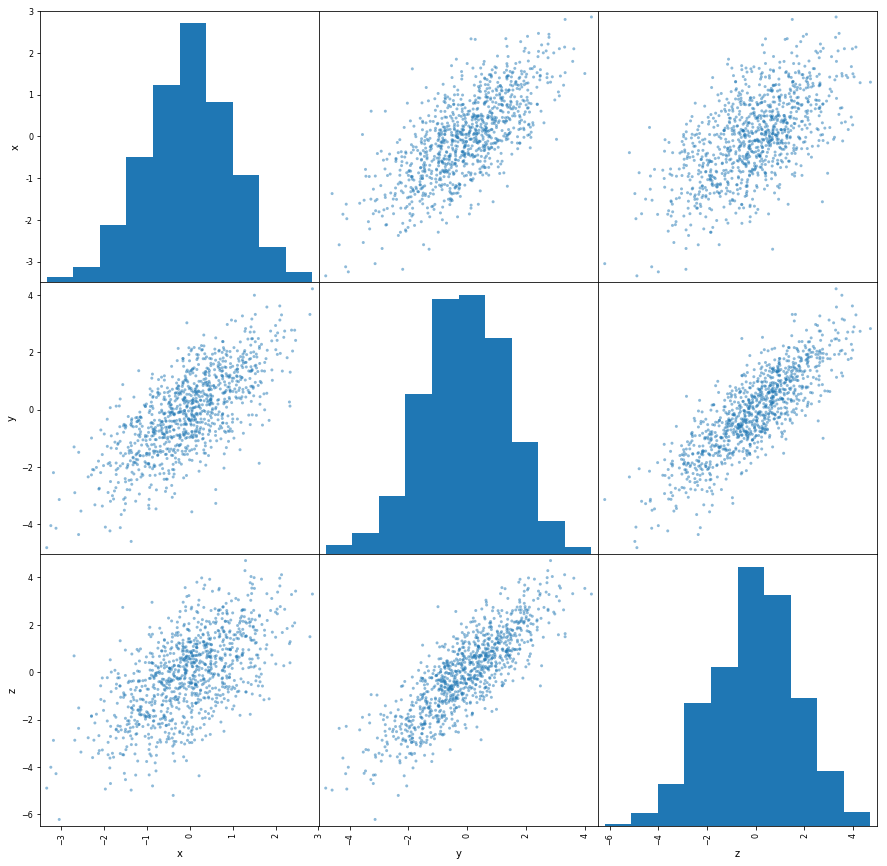

In [69]:
corr = pd.plotting.scatter_matrix(X, figsize=(15, 15))

Just some basic data for me to make sense of the graph above, apparently this is called a [Correlogram](https://python-graph-gallery.com/correlogram/) or pairplot in seabordn or scatter_matrix in pandas

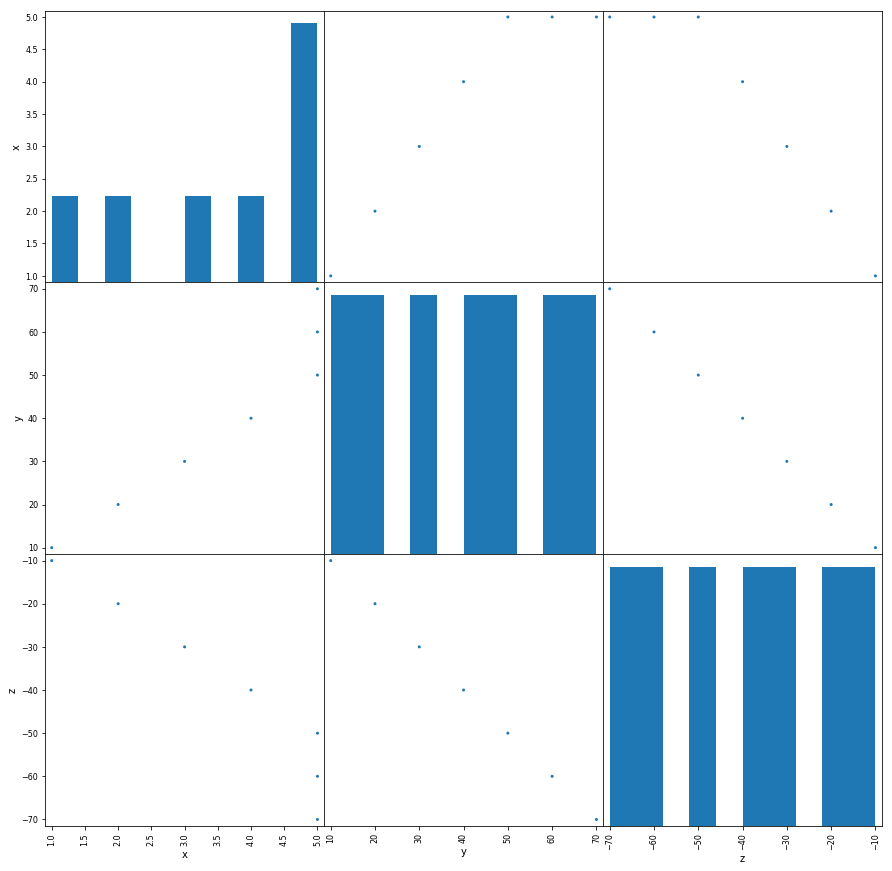

In [70]:
X2 = pd.DataFrame({'x': [1,2,3,4,5,5,5], 'y': [10,20,30,40,50,60,70], 'z': [-10,-20,-30,-40,-50,-60,-70]})
corr = pd.plotting.scatter_matrix(X2, figsize=(15, 15), alpha=2)

In [71]:
from statsmodels.regression.linear_model import OLS

In [72]:
model = OLS(X['z'], X[['y']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2200.
Date:                Sun, 05 Aug 2018   Prob (F-statistic):          1.04e-254
Time:                        14:07:32   Log-Likelihood:                -1398.9
No. Observations:                1000   AIC:                             2800.
Df Residuals:                     999   BIC:                             2805.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              1.0094      0.022     46.903      0.000       0.967       1.052
==============================================================================
Omnibus:                        1.972   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                1.959
Skew:                          -0.030   Prob(JB):                        0.375
Kurtosis:                       3.208   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

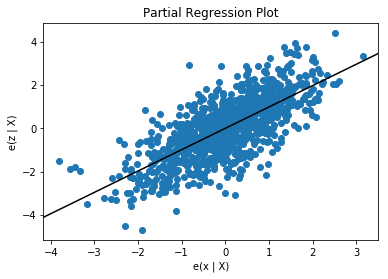

In [73]:
import statsmodels.api as sm
fig = sm.graphics.plot_partregress('z', 'y', ['x'], data=X, obs_labels=False)

In [74]:
model = OLS(X['z'], X[['x']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     547.5
Date:                Sun, 05 Aug 2018   Prob (F-statistic):           6.78e-97
Time:                        14:08:54   Log-Likelihood:                -1762.3
No. Observations:                1000   AIC:                             3527.
Df Residuals:                     999   BIC:                             3532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.0382      0.044     23.398      0.000       0.951       1.125
==============================================================================
Omnibus:                        1.221   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                1.290
Skew:                          -0.079   Prob(JB):                        0.525
Kurtosis:                       2.922   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
model = OLS(X['z'], X[['x','y']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1100.
Date:                Sun, 05 Aug 2018   Prob (F-statistic):          3.78e-253
Time:                        14:09:20   Log-Likelihood:                -1398.4
No. Observations:                1000   AIC:                             2801.
Df Residuals:                     998   BIC:                             2811.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.0426      0.043      0.982      0.326      -0.043       0.128
y              0.9886      0.030     32.686      0.000       0.929       1.048
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.880
Skew:                          -0.030   Prob(JB):                        0.391
Kurtosis:                       3.203   Cond. No.                         2.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
size = 1000
y = np.random.normal(size=size)
x = y + np.random.normal(size=size)
z = y + np.random.normal(size=size)
X_fork = pd.DataFrame({'x': x, 'y': y, 'z': z})

x = np.random.normal(size=size)
z = np.random.normal(size=size)
y = x + z + np.random.normal(size=size)
X_collider = pd.DataFrame({'x': x, 'y': y, 'z': z})

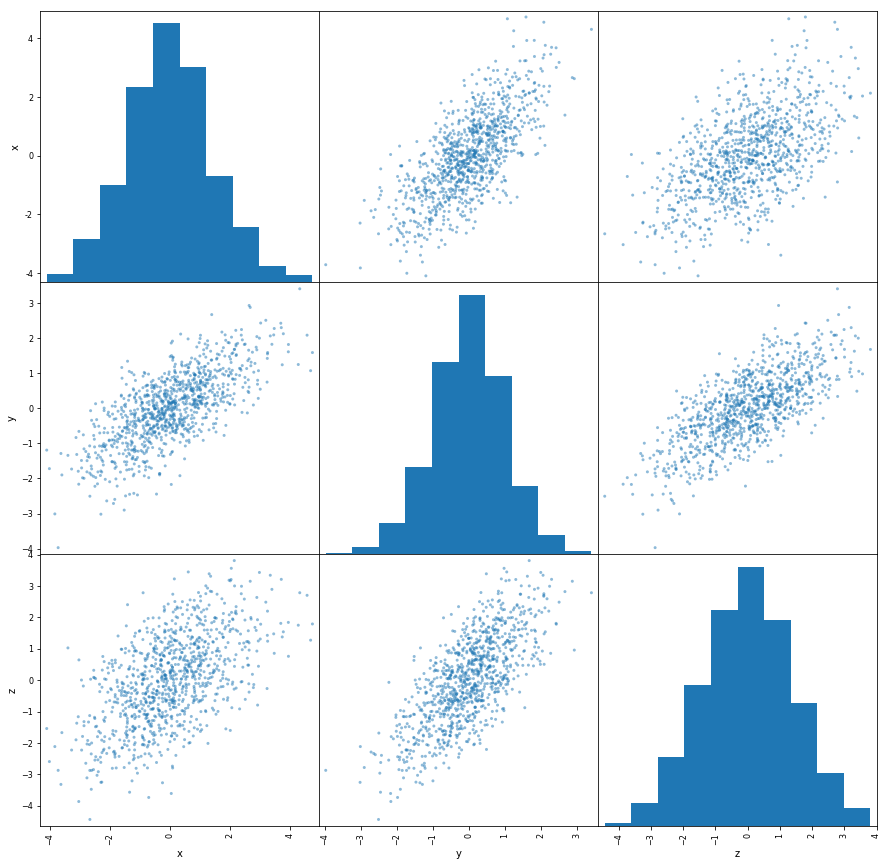

In [78]:
corr = pd.plotting.scatter_matrix(X_fork, figsize=(15, 15))

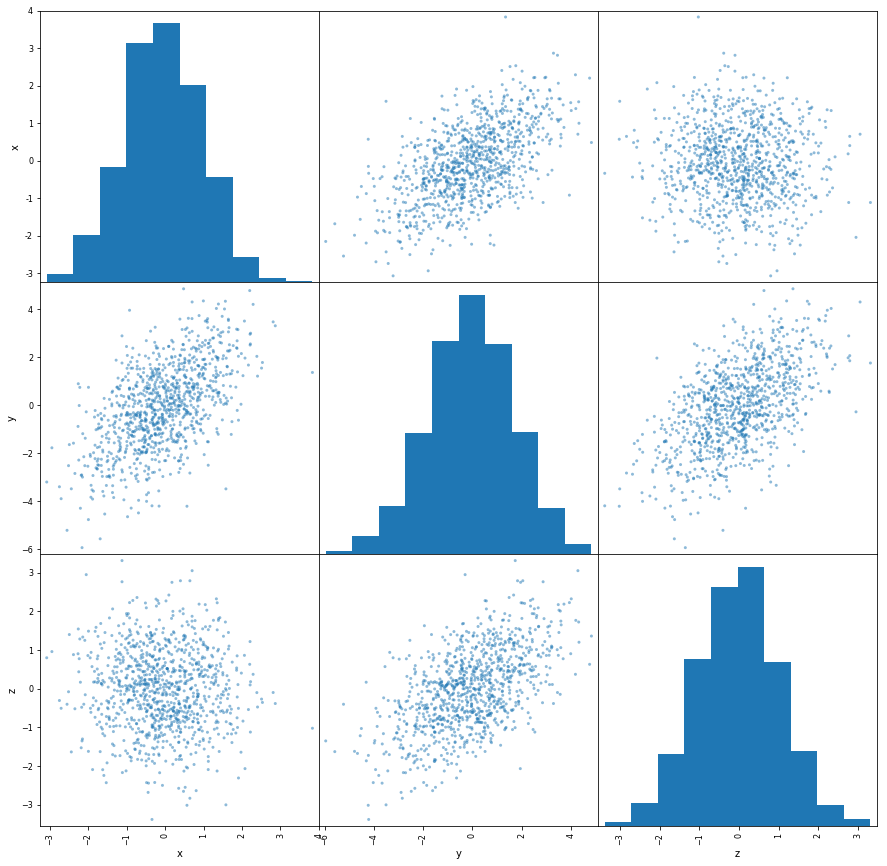

In [79]:
corr = pd.plotting.scatter_matrix(X_collider, figsize=(15, 15))

In [80]:
corr = X_collider.corr()
corr.style.background_gradient()

,x,y,z
x,1,0.569773,-0.0434954
y,0.569773,1,0.55931
z,-0.0434954,0.55931,1


In [84]:
model = OLS(X_fork['z'], X_fork[['x']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     443.8
Date:                Sun, 05 Aug 2018   Prob (F-statistic):           8.30e-82
Time:                        14:42:23   Log-Likelihood:                -1572.0
No. Observations:                1000   AIC:                             3146.
Df Residuals:                     999   BIC:                             3151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.5429      0.026     21.066      0.000       0.492       0.593
==============================================================================
Omnibus:                        6.722   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.982
Skew:                           0.032   Prob(JB):                       0.0828
Kurtosis:                       2.660   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
model = OLS(X_fork['z'], X_fork[['x', 'y']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     533.1
Date:                Sun, 05 Aug 2018   Prob (F-statistic):          3.23e-158
Time:                        14:42:41   Log-Likelihood:                -1392.4
No. Observations:                1000   AIC:                             2789.
Df Residuals:                     998   BIC:                             2799.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.0911      0.031      2.976      0.003       0.031       0.151
y              0.9121      0.044     20.767      0.000       0.826       0.998
==============================================================================
Omnibus:                        7.757   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                5.589
Skew:                           0.036   Prob(JB):                       0.0611
Kurtosis:                       2.641   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
model = OLS(X_collider['y'], X_collider[['x']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     482.5
Date:                Sun, 05 Aug 2018   Prob (F-statistic):           1.45e-87
Time:                        14:52:21   Log-Likelihood:                -1776.7
No. Observations:                1000   AIC:                             3555.
Df Residuals:                     999   BIC:                             3560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.9853      0.045     21.966      0.000       0.897       1.073
==============================================================================
Omnibus:                        1.397   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.274
Skew:                          -0.078   Prob(JB):                        0.529
Kurtosis:                       3.078   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""